<a href="https://colab.research.google.com/github/Zain1796/UK_Insulation_Service/blob/main/visualizaiton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##training

In [ ]:
!pip install pandas numpy scikit-learn matplotlib kmodes seaborn

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt
import seaborn as sns
import os
import logging
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger()

data_path = '/content/drive/MyDrive/insulation_Data/data_sources/training_data.csv'
#plot_path = 'elbow_plot_1.png'
clustered_data_path = '/content/drive/MyDrive/insulation_Data/Cluster Training/clustered_data_25k-500k.csv'
confusion_matrix_path = '/content/drive/MyDrive/insulation_Data/Cluster Training/confusion_matrix_1.png'
cluster_distribution_path =  '/content/drive/MyDrive/insulation_Data/Cluster Training/cluster_distribution.png'
feature_importance_path = '/content/drive/MyDrive/insulation_Data/Cluster Training/feature_importance.png'

# Load the data
logger.info('Loading data from %s', data_path)
dat = pd.read_csv(data_path)
data = dat[25000:500000]
# Drop unnecessary columns
columns_to_drop = ['Postcode', 'Unnamed: 0']  # Adjust based on your dataset
encoded = data.drop(columns=[col for col in columns_to_drop if col in data.columns], errors='ignore')
logger.info('Dropped unnecessary columns: %s', columns_to_drop)

# Define categorical and numerical columns
categorical_cols = ['FLOOR_DESCRIPTION', 'WALLS_DESCRIPTION', 'ROOF_DESCRIPTION',
                    'MAINHEAT_DESCRIPTION', 'MAIN_FUEL']
numerical_cols = ['CURRENT_ENERGY_EFFICIENCY', 'POTENTIAL_ENERGY_EFFICIENCY','Population', 'Households','Distance to sea',
                  'Average Income', 'Num_meters_Gas',
       'Total_cons_kwh_Gas', 'Mean_cons_kwh_Gas', 'Median_cons_kwh_Gas',
       'Num_meters_Elec', 'Total_cons_kwh_Elec', 'Mean_cons_kwh_Elec',
       'Median_cons_kwh_Elec']

# Encode categorical columns
logger.info('Encoding categorical columns: %s', categorical_cols)
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    encoded[col] = le.fit_transform(encoded[col].astype(str))
    label_encoders[col] = le

# Normalize numerical columns
logger.info('Normalizing numerical columns: %s', numerical_cols)
scaler = MinMaxScaler()
encoded[numerical_cols] = scaler.fit_transform(encoded[numerical_cols])

# Sample data for finding optimal clusters
# logger.info('Sampling 1,000 rows for initial clustering analysis')
# sample_data = encoded.sample(n=8000, random_state=42)
categorical_indices = [encoded.columns.get_loc(c) for c in categorical_cols]

# # Find optimal number of clusters using the elbow method
# logger.info('Finding optimal number of clusters using the elbow method')
# costs = []
# k_range = range(2, 10)
# for num_clusters in k_range:
#     logger.info('Fitting KPrototypes for %d clusters', num_clusters)
#     kproto = KPrototypes(n_clusters=num_clusters, init='Cao', random_state=42)
#     kproto.fit_predict(sample_data.to_numpy(), categorical=categorical_indices)
#     costs.append(kproto.cost_)

# # Plot the elbow curve
# logger.info('Plotting the elbow curve')
# plt.figure(figsize=(10, 6))
# plt.plot(k_range, costs, marker='o')
# plt.xlabel('Number of Clusters')
# plt.ylabel('Cost')
# plt.title('Elbow Method For Optimal Clusters')
# plt.grid(True)
# plt.savefig(plot_path)
# logger.info('Elbow plot saved to %s', plot_path)

# Wait for user input to determine optimal clusters
optimal_clusters = 4
logger.info('User selected %d as the optimal number of clusters', optimal_clusters)

# Perform clustering with the optimal number of clusters on the full dataset
logger.info('Performing clustering on the full dataset with %d clusters', optimal_clusters)
kproto = KPrototypes(n_clusters=optimal_clusters, init='Cao', random_state=42)
clusters = kproto.fit_predict(encoded.to_numpy(), categorical=categorical_indices)

# Add cluster assignments to the original data
encoded['Cluster'] = clusters

# Save clustered data
logger.info('Saving clustered data to %s', clustered_data_path)
data['Cluster'] = clusters
data.to_csv(clustered_data_path, index=False)

# Plot cluster distribution
logger.info('Plotting cluster distribution')
plt.figure(figsize=(10, 6))
cluster_counts = encoded['Cluster'].value_counts()
cluster_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Number of Records')
plt.title('Cluster Distribution')
plt.grid(axis='y')
plt.savefig(cluster_distribution_path)
logger.info('Cluster distribution plot saved to %s', cluster_distribution_path)

# Generate feature importance visualization (mean values per cluster)
logger.info('Generating feature importance visualization')
cluster_means = encoded.groupby('Cluster').mean()
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_means[numerical_cols], annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Importance by Cluster (Numerical Columns)')
plt.savefig(feature_importance_path)
logger.info('Feature importance heatmap saved to %s', feature_importance_path)

# Generate and save confusion matrix (dummy example, replace with actual ground truth if available)
if 'GroundTruth' in data.columns:
    logger.info('Generating confusion matrix')
    cm = confusion_matrix(data['GroundTruth'], data['Cluster'], labels=np.unique(data['GroundTruth']))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(data['GroundTruth']))
    disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
    plt.title('Confusion Matrix')
    plt.savefig(confusion_matrix_path)
    logger.info('Confusion matrix saved to %s', confusion_matrix_path)
else:
    logger.warning('Ground truth labels not provided. Unable to compute confusion matrix.')

logger.info('Clustering complete. Results saved to %s. Elbow plot saved to %s. Cluster distribution saved to %s. Feature importance heatmap saved to %s.', clustered_data_path, plot_path, cluster_distribution_path, feature_importance_path)


In [ ]:
import torch
torch.cuda.is_available()

True

##visulaization

In [ ]:
!pip install pandas matplotlib seaborn

<ipython-input-6-7e792f5765ee>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=df, palette='coolwarm')
<ipython-input-6-7e792f5765ee>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=df, palette='Set2')
<ipython-input-6-7e792f5765ee>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=df, palette='Set2')
<ipython-input-6-7e792f5765ee>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variabl

KeyboardInterrupt: 

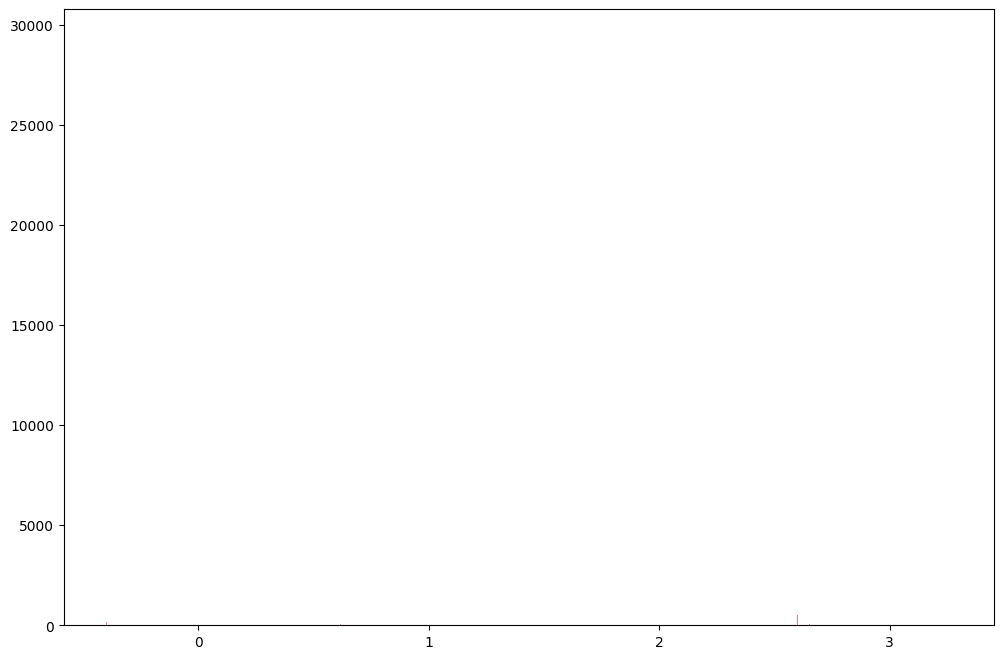

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load the CSV file
file_path = '/content/drive/MyDrive/insulation_Data/Cluster Training/clustered_data_25000-500000.csv'  # Replace with the actual file path
save_dir = '/content/drive/MyDrive/insulation_Data/Cluster Training/Visualizations/'  # Folder to save visualizations

# Create the directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)

# Load the data
df = pd.read_csv(file_path)

# -----------------------------
# 1. Cluster Distribution Plot
# -----------------------------
plt.figure(figsize=(8, 6))
sns.countplot(x='Cluster', data=df, palette='coolwarm')
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Number of Records')
plt.savefig(os.path.join(save_dir, 'Cluster_Distribution.png'))
plt.close()

# --------------------------------------------
# 2. Feature Importance Across Clusters (Boxplot)
# --------------------------------------------
numerical_features = [
    'CURRENT_ENERGY_EFFICIENCY', 'POTENTIAL_ENERGY_EFFICIENCY', 'Population',
    'Households', 'Average Income', 'Distance to sea', 'Num_meters_Gas',
    'Total_cons_kwh_Gas', 'Mean_cons_kwh_Gas', 'Median_cons_kwh_Gas',
    'Num_meters_Elec', 'Total_cons_kwh_Elec', 'Mean_cons_kwh_Elec', 'Median_cons_kwh_Elec'
]

# Loop through features and save boxplots
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=feature, data=df, palette='Set2')
    plt.title(f'{feature} Distribution Across Clusters')
    plt.savefig(os.path.join(save_dir, f'{feature}_Boxplot.png'))
    plt.close()

# -----------------------------------------
# 3. Analyze Wall/Roof Descriptions by Cluster (Categorical)
# -----------------------------------------
# Wall Description
if 'WALLS_DESCRIPTION' in df.columns:
    plt.figure(figsize=(12, 8))
    sns.countplot(x='Cluster', hue='WALLS_DESCRIPTION', data=df)
    plt.title('Wall Description by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Count')
    plt.legend(title='Wall Description', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.savefig(os.path.join(save_dir, 'Wall_Description_by_Cluster.png'))
    plt.close()

# Roof Description
if 'ROOF_DESCRIPTION' in df.columns:
    plt.figure(figsize=(12, 8))
    sns.countplot(x='Cluster', hue='ROOF_DESCRIPTION', data=df)
    plt.title('Roof Description by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Count')
    plt.legend(title='Roof Description', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.savefig(os.path.join(save_dir, 'Roof_Description_by_Cluster.png'))
    plt.close()

print(f"All visualizations have been saved to: {save_dir}")

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Load the CSV file
file_path = '/content/drive/MyDrive/insulation_Data/Cluster Training/clustered_data_25000-500000.csv'  # Replace with actual file path
save_dir = '/content/drive/MyDrive/insulation_Data/Cluster Training/Visualizations/'  # Folder to save visualizations
os.makedirs(save_dir, exist_ok=True)

# Load data
df = pd.read_csv(file_path)

# Select relevant numerical columns and 'Cluster'
numerical_features = [
    'CURRENT_ENERGY_EFFICIENCY', 'POTENTIAL_ENERGY_EFFICIENCY', 'Population',
    'Households', 'Average Income', 'Distance to sea', 'Num_meters_Gas',
    'Total_cons_kwh_Gas', 'Mean_cons_kwh_Gas', 'Median_cons_kwh_Gas',
    'Num_meters_Elec', 'Total_cons_kwh_Elec', 'Mean_cons_kwh_Elec', 'Median_cons_kwh_Elec'
]

# Create a subset DataFrame with numerical features and cluster column
selected_features = numerical_features + ['Cluster']
df_subset = df[selected_features]

# Pair plot
plt.figure(figsize=(14, 12))
pairplot = sns.pairplot(df_subset, hue='Cluster', palette='coolwarm', diag_kind='kde')
pairplot.fig.suptitle("Pair Plot of Attributes Colored by Clusters", y=1.02)  # Title
plt.savefig(os.path.join(save_dir, 'Pairplot_Clusters.png'))
plt.close()

print(f"Pair plot visualization saved to: {os.path.join(save_dir, 'Pairplot_Clusters.png')}")

   Postcode  CURRENT_ENERGY_EFFICIENCY  POTENTIAL_ENERGY_EFFICIENCY  \
0  NR18 0BZ                  63.545455                    82.818182   
1  NR18 0DA                  62.000000                    77.875000   
2  NR18 0DB                  63.333333                    80.100000   
3  NR18 0DE                  64.129032                    81.064516   
4  NR18 0DF                  62.666667                    78.738095   

                                   FLOOR_DESCRIPTION  \
0                     Solid, no insulation (assumed)   
1  Solid, no insulation (assumed), Suspended, no ...   
2  Average thermal transmittance 0.17 W/m-¦K, Sol...   
3  Solid, insulated (assumed), Solid, no insulati...   
4  Solid, limited insulation (assumed), Solid, no...   

                                   WALLS_DESCRIPTION  \
0  Cavity wall, as built, no insulation (assumed)...   
1  Cavity wall, as built, insulated (assumed), Ca...   
2  Average thermal transmittance 0.23 W/m-¦K, Ave...   
3  Cavity wa

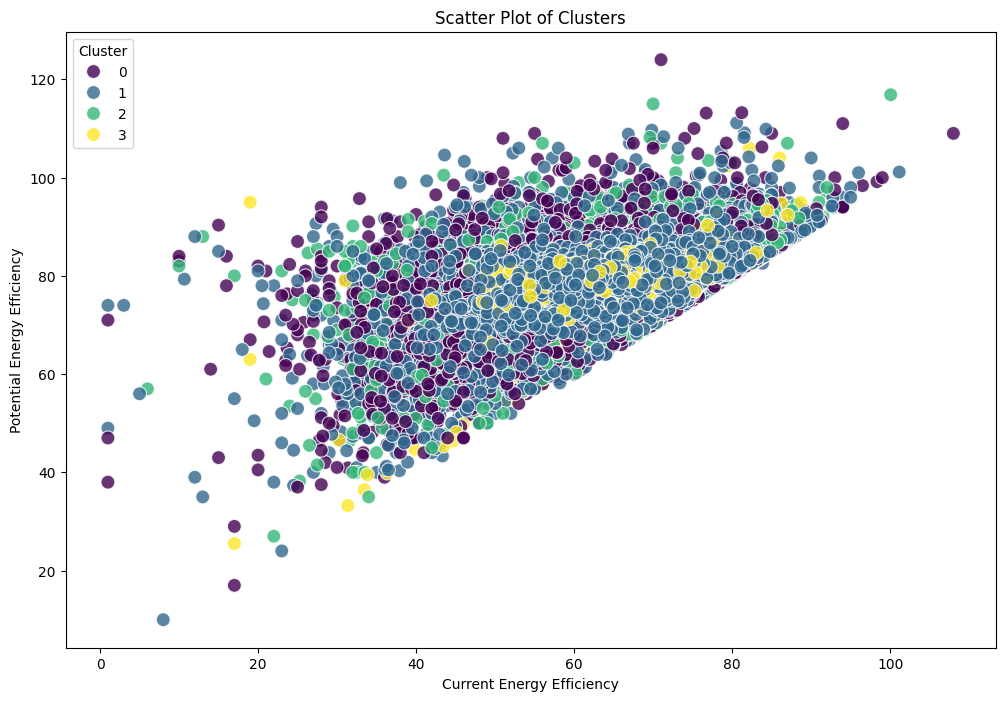

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from CSV file
file_path = '/content/drive/MyDrive/insulation_Data/Cluster Training/clustered_data_25000-500000.csv'  # Replace with actual file path
df = pd.read_csv(file_path)

# Display first few rows to check the data
print(df.head())

# Scatter plot to visualize clustering
plt.figure(figsize=(12, 8))

# Use Seaborn scatterplot with 4 clusters
sns.scatterplot(
    data=df,
    x="CURRENT_ENERGY_EFFICIENCY",  # Feature for X-axis
    y="POTENTIAL_ENERGY_EFFICIENCY",  # Feature for Y-axis
    hue="Cluster",  # Represent clusters with different colors
    palette="viridis",  # Choose a color palette
    s=100,  # Size of scatter points
    alpha=0.8  # Transparency
)

# Add titles and axis labels
plt.title("Scatter Plot of Clusters")
plt.xlabel("Current Energy Efficiency")
plt.ylabel("Potential Energy Efficiency")

# Show the plot
plt.legend(title="Cluster")
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
plt.savefig('/content/drive/MyDrive/insulation_Data/Cluster Training/Visualizations/Pairplot_Clusters.png')

<Figure size 640x480 with 0 Axes>

Index(['Postcode', 'CURRENT_ENERGY_EFFICIENCY', 'POTENTIAL_ENERGY_EFFICIENCY',
       'FLOOR_DESCRIPTION', 'WALLS_DESCRIPTION', 'ROOF_DESCRIPTION',
       'MAINHEAT_DESCRIPTION', 'MAIN_FUEL', 'Population', 'Households',
       'Average Income', 'Distance to sea', 'Num_meters_Gas',
       'Total_cons_kwh_Gas', 'Mean_cons_kwh_Gas', 'Median_cons_kwh_Gas',
       'Num_meters_Elec', 'Total_cons_kwh_Elec', 'Mean_cons_kwh_Elec',
       'Median_cons_kwh_Elec', 'Cluster'],
      dtype='object')


<ipython-input-4-bf99e0544061>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Cluster"] = data["Cluster"].astype("category")


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/insulation_Data/Cluster Training/visualization/scatter_plot_clusters.png'

<Figure size 1200x1000 with 0 Axes>

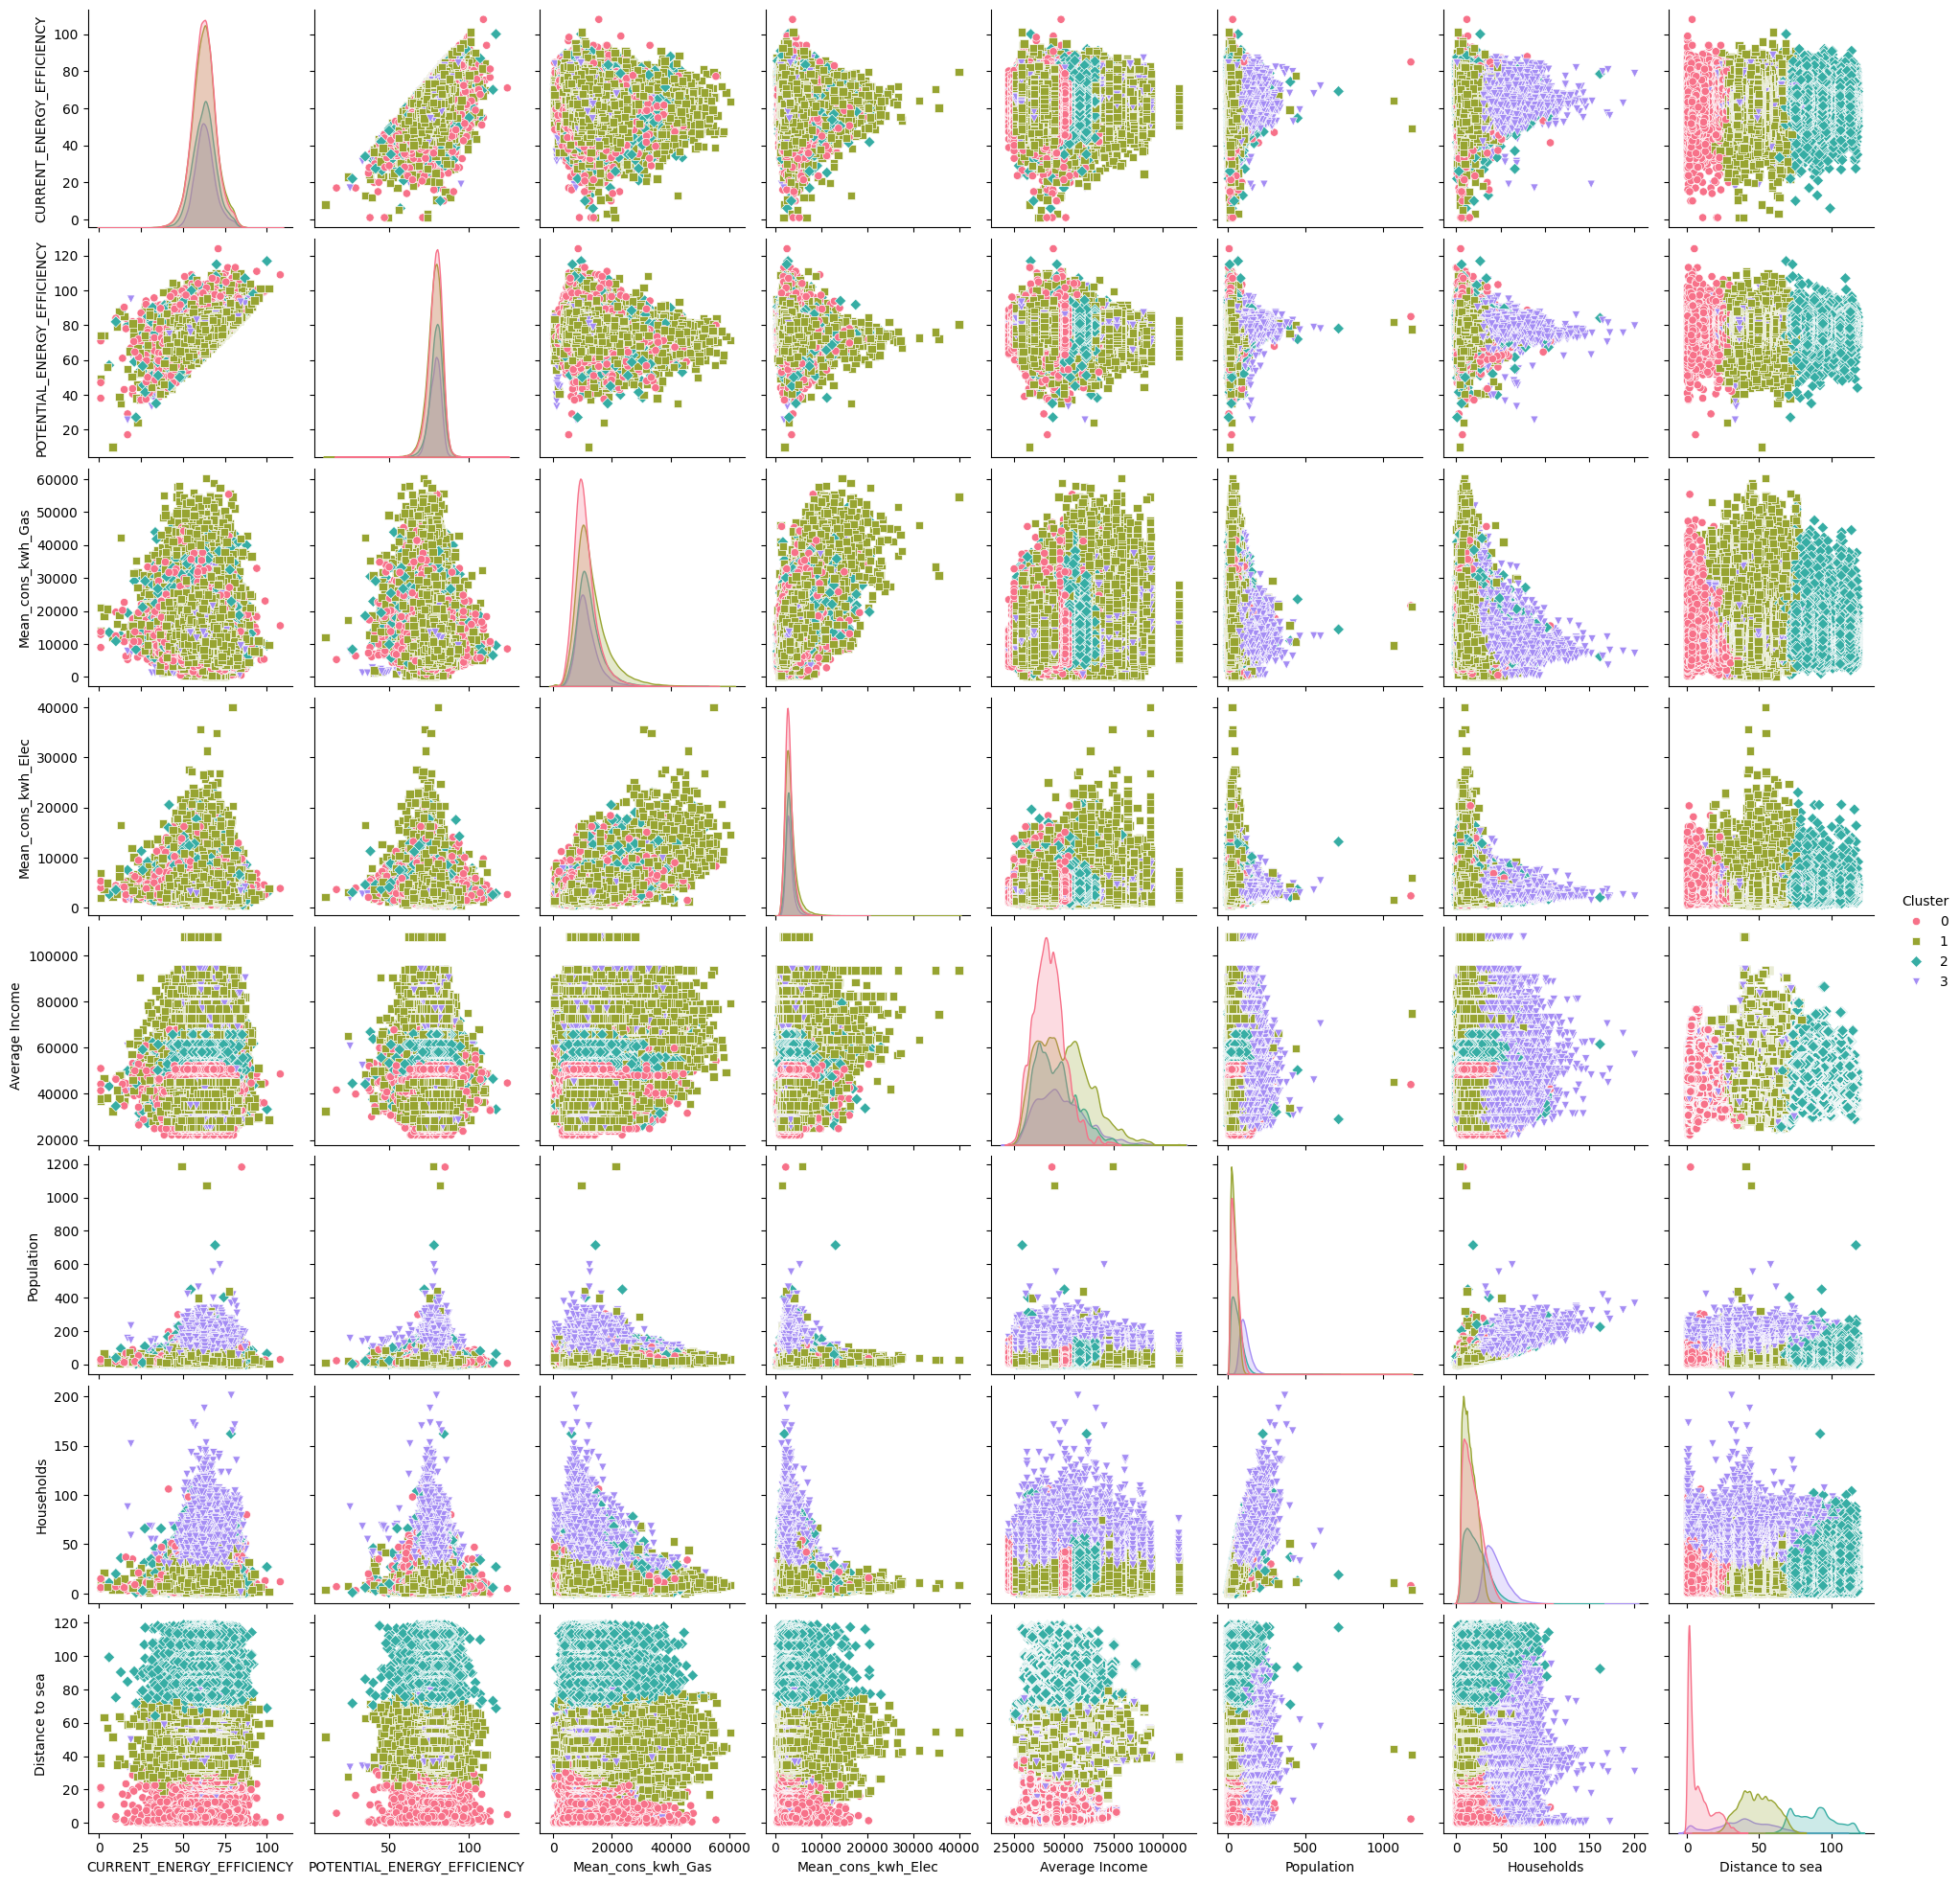

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data from CSV file
file_path = '/content/drive/MyDrive/insulation_Data/Cluster Training/clustered_data_25000-500000.csv'  # Replace with actual file path
output_path = "/content/drive/MyDrive/insulation_Data/Cluster Training/visualization/"  # Path to save the plot

df = pd.read_csv(file_path)
print(df.columns)

# Select relevant numerical features for visualization
selected_features = [
    "CURRENT_ENERGY_EFFICIENCY",
    "POTENTIAL_ENERGY_EFFICIENCY",
    "Mean_cons_kwh_Gas",
    "Mean_cons_kwh_Elec",
    "Average Income",
    "Population",
    "Households",
    "Distance to sea",
    "Cluster"
]

# Ensure the selected features exist in the data
data = df[selected_features]

# Convert 'Cluster' to a categorical variable for better visualization
data["Cluster"] = data["Cluster"].astype("category")

# Pair plot to visualize clusters across multiple features
plt.figure(figsize=(12, 10))
pair_plot = sns.pairplot(
    data=data,
    hue="Cluster",  # Color by cluster
    palette="husl",  # Color palette for clusters
    diag_kind="kde",  # Use KDE for diagonal plots
    markers=["o", "s", "D", "v"]  # Markers for different clusters
)

# Save the visualization to the specified output path
pair_plot.savefig(output_path, dpi=300, bbox_inches="tight")
print(f"Pair plot saved to: {output_path}")

# Show the plot
plt.show()
